# OSSE maps

In [26]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.mod_plot import *
import warnings
warnings.filterwarnings("ignore")

file_mask_osse = "/Odyssey/public/glorys/obs_masks/global_obs_6sats_masks_2022.pickle"

obj = pd.read_pickle(file_mask_osse)

In [30]:
lon = np.linspace(-180, 180, 1440)  # 100 bins entre -180° et 180°
lat = np.linspace(-90, 90, 680)     # 50 bins entre -90° et 90°


In [33]:
lon.shape

(1440,)

In [32]:
obj[0].shape

(680, 1440)

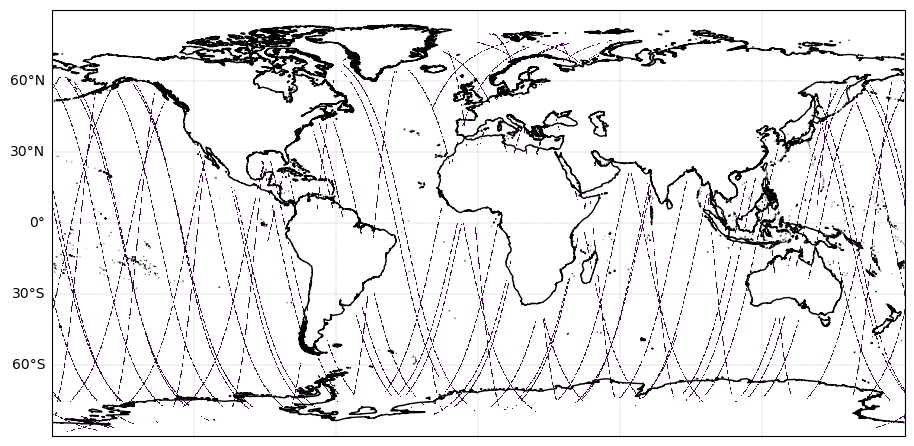

In [37]:
fig, axs = plt.subplots(nrows=1,ncols=1,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(11,7.5))


p0 = axs.pcolormesh(lon, lat, obj[0])

#axs.set_title(ds_maps_leadtime_i.time[index_time].values)

axs.coastlines(resolution='10m', lw=1)
# optional add grid lines
p0.axes.gridlines(color='black', alpha=0., linestyle='--')
# draw parallels/meridiens and write labels
gl = p0.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                        linewidth=0.2, color='black', alpha=0.5, linestyle='--')
# adjust labels to taste
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_bottom = False
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}


#cax = fig.add_axes([0.92, 0.37, 0.02, 0.25])
#cbar = fig.colorbar(p0, cax=cax, orientation='vertical')
#cax.set_ylabel('ssh?[m]', fontweight='bold')